# Aloha

This is a short introduction to Aloha, a simple and yet interesting way to access a shared medium of communication.

Aloha is probably the simplest protocol to regulate the access to a shared medium. When a station needs to send a frame, it simply starts the transmission (without checking if the channel is busy). The price of the simplicity is that it does not support a high level of traffic.

In this part, we will study the performance of the protocol in two forms: pure Aloha and slotted aloha. The difference between the two versions is the synchronization between the nodes: in slotted aloha, the time is divided in slots, usually the time of a frame, and the start of a transmission can only take place at the beginning of a time slot.

## Pure Aloha 🧪

In pure Aloha, nodes are not synchronized, and start sending a frame whenever they have one to send. A frame is considered to be successfully sent if there is no collision, i.e. there is only this frame on the channel; On the contrary, if two or more nodes in the system are sending a frame at the same moment, there will be a collision, and none of the frame will be received successfully (yes it is a simplification, in reality, one frame can still be received depending on the signal strength, but in the context of this exercice, we will consider that none of the colliding frames can be correctly received). Note also that here we ignore other errors such as interferences.

Let us now consider a few scenarios.

![Figure 1: 2 successfull transmissions](images/figures.001.png)
![Figure 2: 2 frames are in collision](images/figures.002.png)


Figure 1 describes the successful transmission of two frames by two different nodes.

Figure 2 describes a collision. We can see that node 2 is starting its transmission while node 1 was still sending its frame. Note that a partial overlap between two frames is enough to consider that the two frames are in collision, and thus lost. This might not always be the case in reality, but this is the hypothesis we will make all along this document.

>**Questions**

>In the example illustrated in Figure 3, how many frames are in collision?

>In the example illustrated in Figure 3, how many frames are successfull?

>In the example illustrated in Figure 3, how many collision periods are there?

![Figure 3: example scenario](images/figures.003.png)


## Vulnerable time

Let us now focus on the collision / success probabilities. From the point of view of a sender, we call vulnerable time, the time window in which if a neighbor starts sending a frame, there is going to be a collision. For example, considering a frame is sent at t0 and the sending time is T, if another node is starting to send its own frame at t0 + T/2, there will be a collision, as presented in figure 2.

>**Questions**

>Using Figure 4, in which we focus on the frame sent by node 3,

>When do the vulnerable time starts? (t1, t2, t3, t4, t5, t6, t7)

>When do the vulnerable time ends? ((t1, t2, t3, t4, t5, t6, t7)

>What is the length of the vulnerable time, as a function of T?

![Figure 4](images/figures.004.png)

## Generated traffic and network accuracy

We call ___generated traffic___ the traffic that all nodes in the considered system want to inject. Usually we model this traffic by a Poisson law. What is important to note here, is the following parameters:
* g, the average number of frames generated per second, and
* G = gT, the average time of generated frames.

When G > 1, there is not enough time to send all generated frames.

When G = 1, if all nodes were perfectly synchronized and each node would send just after another node, the traffic could be successfully sent. In reality, it is very hard to achieve this efficiency.

When G < 1, the traffic could be successfully sent, but just as in the previous case, the proportion of successful frames depends on the algorithm to access the channel.

In order to measure the algorithm efficiency, we measure the percentage of time the channel is used to transport a successful frame. We write S this metric, also called ___network accuracy___.

So if we reach S = 1, it means that the channel is always used with successful frames, without collision, and without periods of time when the channel empty. S cannot be bigger than 1. S = 0 means that the channel is never used to transmit successful frames, so it means that there are only collisions, or idle times.

![Figure 5: 2 successfull transmisions during 3 periods, S = 2/3](images/figures.005.png)

For example, in figure 5, between [t1;t4] we have 2 frames that are successfully sent, and the channel is busy during the remaining time (T). So the channel is used for successful frames during 2T. So S = 2T/3T = 2/3. 

>**Questions**

![Figure 6](images/figures.006.png)
>In figure 6, what is the value of S considering the interval [t1;t4]?

![Figure 7](images/figures.007.png)
>In figure 7, what is the value of S considering the interval [t1;t4]?

![Figure 8](images/figures.008.png)
>In figure 8, what is the value of S considering the interval [t1;t4]?

## Let's play!

The following program simulate a system of nodes that are using Aloha. We make the hypothesis that the number of nodes is large. For seek of simplicity, we do not distinguish the different nodes in the system, so we simulate a given number of frames in the system, and we just check whether a frame is sent at the same time than another one (more precisely, we check if two consecutive frames overlap). The general concept of the code is to manipulate an array containing the time between the beginning of two consecutive frames.

Let us first simulate the three last scenarios above.
To do that, we need to properly configure the time between frames. By default, the code is configured to play Fig 6, which means that the array containing the delay between each start of frames is:
timeInterval = [0, T, T]

>**Question**

>Run the code and read the value of S at the issue of the simulation.





In [ ]:
import math
import numpy as np
import random
import matplotlib.pyplot as pl

################## PARAMETERS ##################
#Frame Duration
T = 1.
#Array that contain the time between each beginning of frames
timeInterval = [0, T/2, T/2, T, T/3]
#Number of frame generated for the system
nbFrame = len(timeInterval)
################################################


#Count the number of success
success = 0
#Count the number of collisions
collision = 0

#True when there is an ongoing collision
activeCollision = False
#Account the time of the simulation
time = 0

for i in range(nbFrame):
    time += timeInterval[i]
    if (i+1) < len(timeInterval) and timeInterval[i+1] < T :
        #Then it is a collision (we only count one collision whatever the number of frames that collide)
        if not activeCollision :
            collision += 1
            activeCollision = True
    else :
        if not activeCollision :
            success += 1
        activeCollision = False

#We divide by time+T because we did not count the last frame in time.
print("There were " + str(nbFrame) + " frames sent in " + str(time+T))
success = success * T / (time+T)
collision = collision * T / (time+T)
print("S = " + str(success))


>**Questions**

>Now change the timeInterval array in the code to match the scenario of Fig. 7. Please give this array:

> Now run the code and give the value of S: 

>Now change the timeInterval array in the code to match the scenario of Fig. 8. Please give this array:

> Now run the code and give the value of S: 

## Larger simulations

Now in order to run larger simulations, let us use random numbers to fill the timeInterval array used to store the delay between each frame. The traffic is generated following a Poisson Law, with parameter **g, the average number of generated frames**. So the traffic load is [**G = gT**]. So you can configure the following parameters:
- G between 0 and any numbers, e.g. 0.1. (remember that G>1 implies more traffic than it is possible to send)
- nbFrame which represents how many frames you want to simulate (e.g., 1000)

Run the simulation below (with G = 0.1 and nbFrame = 1000).

In [ ]:
import math
import numpy as np
import random
import matplotlib.pyplot as pl

################## PARAMETERS ##################
#Frame Duration
T = 1.
#Input traffic duration - G = 1 when there is always one frame to send.
G = [0.1]
#Number of frame generated for the system
nbFrame = 1000
#True to generate the plot.

################################################


#Count the number of success
success = []
#Count the number of collisions
collision = []

random.seed()

#used for success[] and collisions[]
index = 0

#For each input traffic, we calculate the channel occupancy time with successfull frames
for j in G :
    #print("G = " + str(j))
    #time interval between each starting of a frame.
    g = j / T
    success.append(0)
    #count the number of collisions
    collision.append(0)
    #True when there is an ongoing collision
    activeCollision = False
    #Account the time of the simulation
    time = 0
    #We pick the time between two consecutive transmissions
    timeInterval = np.random.exponential((1/g), nbFrame)

    #for i in range(len(timeInterval)-1):
    #We stop after nbFrame have been sent (to avoid quasi infinite loop because of the retransmission)
    for i in range(nbFrame):
        time += timeInterval[i]
        if (i+1) < len(timeInterval) and timeInterval[i+1] < T :
            #Then it is a collision (we only count one collision whatever the number of frames that collide)
            if not activeCollision :
                collision[index] += 1
                activeCollision = True
        else :
            if not activeCollision :
                success[index] += 1
                #print(success[index])
            activeCollision = False

    #We divide by time+T because we did not count the last frame in time.
    print(time+T)
    success[index] = success[index] * T / (time+T)
    collision[index] = collision[index] * T / (time+T)
    print("S = " + str(success[index]))
    #Index of the success tab.
    index += 1


>**Question**

> Give the value of S ?

(=> S = 0.084, but can vary a lot)

>**Questions**

>Now we will try other value for G, let us increase it, run the simulation and then give the value of S for the following values of G: 

> G = [0.15] => S =

> G = [0.2] => S = 

> G = [0.8] => S = 

## Plots

Now to allow to better see the performance of the system for different values of traffic load, let us make G varies from 0 to 1, and plot the result (S).
Run the code below to plot this scenario.

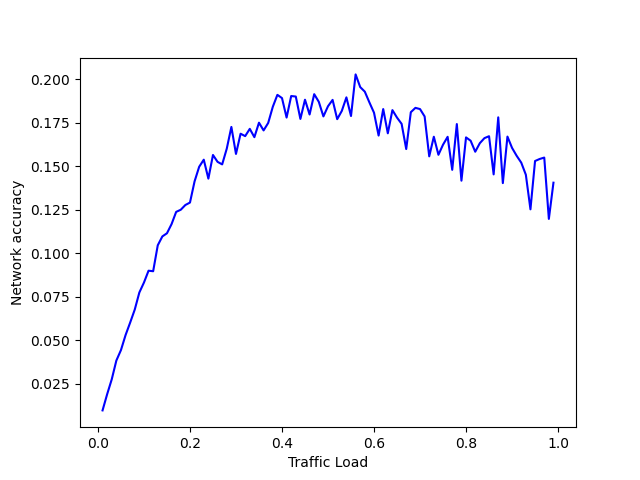

In [7]:
import math
import numpy as np
import random
import matplotlib.pyplot as pl

################## PARAMETERS ##################
#Frame Duration
T = 1.
#Maximum traffic load (G)
maxG = 1
#Input traffic duration - G = 1 when there is always one frame to send.
G = [i / 100 for i in range(1, maxG*100, 1)]
#True if Aloha slotted
slotted = False
#Number of frame generated for the system
nbFrame = 1000
#True to generate the plot.
doIPlot = True
#Plot the occupancy of the channel by collisions?
plotCollision = False

################################################


#Count the number of success
success = []
#Count the number of collisions
collision = []

random.seed()

#used for success[] and collisions[]
index = 0

#For each input traffic, we calculate the channel occupancy time with successfull frames
for j in G :
    #print("G = " + str(j))
    #time interval between each starting of a frame.
    g = j / T
    success.append(0)
    #count the number of collisions
    collision.append(0)
    #True when there is an ongoing collision
    activeCollision = False
    #Account the time of the simulation
    time = 0
    #We pick the time between two consecutive transmissions
    timeInterval = np.random.exponential((1/g), nbFrame)
    #If we use the slotted version, we shift the beginning of the transmission at the beginning of each timeslot (a timeslot is the size of a frame)
    if slotted :
        total = timeInterval[0]
        timeInterval[0] = previous = total // T * T + T
        for l in range (1, len(timeInterval)) :
            total += timeInterval[l]
            temp = total // T * T + T
            timeInterval[l] = temp - previous
            previous = temp

    #for i in range(len(timeInterval)-1):
    #We stop after nbFrame have been sent (to avoid quasi infinite loop because of the retransmission)
    for i in range(nbFrame):
        time += timeInterval[i]
        if (i+1) < len(timeInterval) and timeInterval[i+1] < T :
            #Then it is a collision (we only count one collision whatever the number of frames that collide)
            if not activeCollision :
                collision[index] += 1
                activeCollision = True
        else :
            if not activeCollision :
                success[index] += 1
            activeCollision = False

    success[index] = success[index] * T / (time+T)
    collision[index] = collision[index] * T / (time+T)
    #Index of the success tab.
    index += 1

if doIPlot :
    pl.plot(G, success, 'b')
    if plotCollision :
        pl.plot(G, collision, 'r')
    pl.xlabel('Traffic Load')
    pl.ylabel('Network accuracy')
    pl.show()


> **Question**

> Can you comment this plot?

Now, you can smooth the plot by simulating more frames?

Can you change in the code the number of frames to be 10000 ([nbFrame = 10000]) or even 100000.

> ** Question **

> What is the maximum network accuracy you observe?

Now, you can change the maximum value of G to be 5 ([max = 5] in the code), so you will simulate different traffic load, from 0.1 to 5. Keep [nbFrame = 10000] to keep a reasonable simulation time. Run the code.

>** Question**

>Can you commment this plot?

Now if you set the boolean plotCollision to True, i.e., [plotCollision = True] in the code, you will plot in red the channel occupancy time with collisions.

>**Question**

>Can you comment the form of the collision in comparison with the one of S the network accuracy?

## Slotted Aloha